# Simulated annealing

Mediante esta técnica de búsqueda heurística intentaremos aproximarnos al mínimo de la siguiente función:

$$
f(x,y) = 0.2 + x^2 + y^2 - 0.1 \cdot \cos(6 \pi x) - 0.1 \cdot \cos(6 \pi y)
$$

<img src="imgs/function_min.jpg" width=70%>

Su mínimo se encuentra en el punto $(0,0)$.

iteration Number =  1   best_so_far =  [20.01512611 34.41318942]   new_best = 1584.96815
iteration Number =  2   best_so_far =  [20.01607753 34.36600137]   new_best = 1581.68692
iteration Number =  3   best_so_far =  [20.04810618 34.32667921]   new_best = 1580.28601
iteration Number =  4   best_so_far =  [20.07854968 34.28012862]   new_best = 1578.41309
iteration Number =  5   best_so_far =  [20.1274608  34.24328271]   new_best = 1578.00476
iteration Number =  6   best_so_far =  [20.11252417 34.22025335]   new_best = 1575.84548
iteration Number =  7   best_so_far =  [20.05808452 34.19146481]   new_best = 1571.62633
iteration Number =  8   best_so_far =  [19.97393948 34.20292407]   new_best = 1568.98935
iteration Number =  9   best_so_far =  [19.88610822 34.2451557 ]   new_best = 1568.45439
iteration Number =  13   best_so_far =  [19.8532846  34.23508042]   new_best = 1566.51663
iteration Number =  15   best_so_far =  [19.85198081 34.1935925 ]   new_best = 1563.68547
iteration Number = 

iteration Number =  363   best_so_far =  [16.7225534 27.4454463]   new_best = 1033.09636
iteration Number =  365   best_so_far =  [16.66921843 27.42799328]   new_best = 1030.27743
iteration Number =  366   best_so_far =  [16.61197848 27.43394515]   new_best = 1028.75911
iteration Number =  368   best_so_far =  [16.62997857 27.37408585]   new_best = 1025.94736
iteration Number =  369   best_so_far =  [16.56041693 27.36910133]   new_best = 1023.47876
iteration Number =  370   best_so_far =  [16.56039    27.35024743]   new_best = 1022.42987
iteration Number =  372   best_so_far =  [16.47292428 27.29166375]   new_best = 1016.40932
iteration Number =  373   best_so_far =  [16.50599863 27.25843132]   new_best = 1015.75520
iteration Number =  378   best_so_far =  [16.50348345 27.22252427]   new_best = 1013.78145
iteration Number =  379   best_so_far =  [16.42139767 27.15404674]   new_best = 1007.30937
iteration Number =  380   best_so_far =  [16.39540611 27.13493427]   new_best = 1005.35593
i

iteration Number =  589   best_so_far =  [14.56919718 23.18690756]   new_best = 750.21458
iteration Number =  590   best_so_far =  [14.58056756 23.09466682]   new_best = 746.18255
iteration Number =  591   best_so_far =  [14.52485094 23.03763841]   new_best = 741.91697
iteration Number =  592   best_so_far =  [14.51525355 22.99227157]   new_best = 739.53451
iteration Number =  593   best_so_far =  [14.4966415  22.96376016]   new_best = 737.70989
iteration Number =  594   best_so_far =  [14.53177653 22.93437739]   new_best = 737.40968
iteration Number =  596   best_so_far =  [14.43308721 22.91498147]   new_best = 733.64453
iteration Number =  597   best_so_far =  [14.41442798 22.86339929]   new_best = 730.79078
iteration Number =  598   best_so_far =  [14.38658233 22.83225405]   new_best = 728.53113
iteration Number =  604   best_so_far =  [14.36418456 22.82672047]   new_best = 727.60403
iteration Number =  606   best_so_far =  [14.33009325 22.80107857]   new_best = 725.42234
iteration 

iteration Number =  876   best_so_far =  [11.36219764 18.60052527]   new_best = 475.16233
iteration Number =  877   best_so_far =  [11.37105823 18.58777409]   new_best = 474.92280
iteration Number =  878   best_so_far =  [11.41931069 18.54717067]   new_best = 474.66635
iteration Number =  879   best_so_far =  [11.44150542 18.5209502 ]   new_best = 474.27090
iteration Number =  881   best_so_far =  [11.37854712 18.52917024]   new_best = 473.02098
iteration Number =  882   best_so_far =  [11.39920957 18.48172193]   new_best = 471.77688
iteration Number =  887   best_so_far =  [11.36755426 18.43875804]   new_best = 469.36831
iteration Number =  888   best_so_far =  [11.32854708 18.4049715 ]   new_best = 467.15656
iteration Number =  889   best_so_far =  [11.34423399 18.34025049]   new_best = 465.05913
iteration Number =  891   best_so_far =  [11.33964822 18.28655284]   new_best = 463.02348
iteration Number =  892   best_so_far =  [11.33874973 18.2869242 ]   new_best = 463.01597
iteration 

iteration Number =  1146   best_so_far =  [ 8.78623343 13.7209944 ]   new_best = 265.67368
iteration Number =  1148   best_so_far =  [ 8.85519438 13.66217641]   new_best = 265.26178
iteration Number =  1149   best_so_far =  [ 8.74838539 13.62105349]   new_best = 262.19913
iteration Number =  1151   best_so_far =  [ 8.70217513 13.64254958]   new_best = 261.87878
iteration Number =  1153   best_so_far =  [ 8.68367404 13.64559745]   new_best = 261.62155
iteration Number =  1155   best_so_far =  [ 8.65571315 13.66298631]   new_best = 261.60108
iteration Number =  1158   best_so_far =  [ 8.60765512 13.62950829]   new_best = 259.93543
iteration Number =  1159   best_so_far =  [ 8.53829933 13.6403821 ]   new_best = 259.15033
iteration Number =  1160   best_so_far =  [ 8.52149504 13.59061934]   new_best = 257.59996
iteration Number =  1161   best_so_far =  [ 8.50944887 13.56286664]   new_best = 256.69890
iteration Number =  1164   best_so_far =  [ 8.43944715 13.59643014]   new_best = 256.30468

iteration Number =  1393   best_so_far =  [5.45619203 9.16047042]   new_best = 114.05108
iteration Number =  1394   best_so_far =  [5.38601809 9.16814834]   new_best = 113.30925
iteration Number =  1396   best_so_far =  [5.34459366 9.10994631]   new_best = 111.70563
iteration Number =  1397   best_so_far =  [5.31709908 9.09987817]   new_best = 111.21426
iteration Number =  1399   best_so_far =  [5.3075077  9.07521874]   new_best = 110.62525
iteration Number =  1400   best_so_far =  [5.32619399 9.05447194]   new_best = 110.40056
iteration Number =  1401   best_so_far =  [5.31132279 9.02712161]   new_best = 109.72022
iteration Number =  1403   best_so_far =  [5.24887822 9.04291282]   new_best = 109.45801
iteration Number =  1404   best_so_far =  [5.25007617 9.0263499 ]   new_best = 109.15029
iteration Number =  1405   best_so_far =  [5.20806943 9.03958697]   new_best = 109.03562
iteration Number =  1407   best_so_far =  [5.14205621 9.04007322]   new_best = 108.37982
iteration Number =  1

iteration Number =  1583   best_so_far =  [3.50798186 5.73228126]   new_best = 45.43080
iteration Number =  1584   best_so_far =  [3.46118162 5.69683274]   new_best = 44.62352
iteration Number =  1585   best_so_far =  [3.40700913 5.66112893]   new_best = 43.73838
iteration Number =  1586   best_so_far =  [3.32911143 5.70169519]   new_best = 43.61347
iteration Number =  1587   best_so_far =  [3.28643414 5.7177318 ]   new_best = 43.57244
iteration Number =  1589   best_so_far =  [3.32163639 5.69543793]   new_best = 43.48793
iteration Number =  1590   best_so_far =  [3.3983046  5.58234765]   new_best = 42.87915
iteration Number =  1595   best_so_far =  [3.35707963 5.58337111]   new_best = 42.55403
iteration Number =  1596   best_so_far =  [3.34041117 5.58595177]   new_best = 42.45744
iteration Number =  1599   best_so_far =  [3.31320932 5.58305434]   new_best = 42.25586
iteration Number =  1600   best_so_far =  [3.28071104 5.55269296]   new_best = 41.79576
iteration Number =  1604   best_

iteration Number =  1858   best_so_far =  [0.89531612 1.19166698]   new_best = 2.55000
iteration Number =  1859   best_so_far =  [0.87902332 1.16713802]   new_best = 2.50008
iteration Number =  1867   best_so_far =  [0.92594005 1.15761344]   new_best = 2.47863
iteration Number =  1868   best_so_far =  [1.00109169 1.13069575]   new_best = 2.45852
iteration Number =  1875   best_so_far =  [0.90490603 1.06525794]   new_best = 2.14219
iteration Number =  1877   best_so_far =  [0.88357399 1.0333267 ]   new_best = 2.02598
iteration Number =  1879   best_so_far =  [0.85381162 1.00174962]   new_best = 1.92521
iteration Number =  1881   best_so_far =  [0.83917595 0.94947936]   new_best = 1.84719
iteration Number =  1882   best_so_far =  [0.75739943 0.93892653]   new_best = 1.62841
iteration Number =  1883   best_so_far =  [0.69488601 0.94818308]   new_best = 1.43978
iteration Number =  1886   best_so_far =  [0.65024325 0.92872908]   new_best = 1.36763
iteration Number =  1889   best_so_far =  [

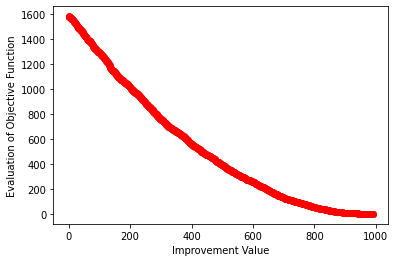

In [71]:
from numpy import asarray, exp
from numpy.random import randn, rand, seed
from matplotlib import pyplot
import math


# define objective function
def objective(step):
    x1 = step[0]
    x2 = step[1]
    obj = 0.2 + x1**2 + x2**2 - 0.1*math.cos(6.0*3.1415*x1) - 0.1*math.cos(6.0*3.1415*x2)
    return obj


# Define simulated annealing algorithm
def sa(objective, area, iterations, step_size, temperature):
    # create initial point
    start_point = area[:, 0] + rand( len( area ) ) * ( area[:, 1] - area[:, 0] )
    
    # evaluate initial point
    start_point_eval = objective(start_point)
    
    # Assign previous and new solution to previous and new_point_eval variable 
    mia_start_point, mia_start_eval = start_point, start_point_eval
    outputs = []
    
    for i in range(iterations):
        
        # First step by mia
        mia_step = mia_start_point + randn( len( area ) ) * step_size  
        mia_step_eval = objective(mia_step)
        
        if mia_step_eval < start_point_eval:
            start_point, start_point_eval = mia_step, mia_step_eval
            outputs.append(start_point_eval)  #Append the new values into the output list
            #print('Acceptance Criteria = %.5f' % mac," ",'iteration Number = ',i," ", 'best_so_far = ',start_point," " ,'new_best = %.5f' % start_point_eval)
            print('iteration Number = ',i," ", 'best_so_far = ',start_point," " ,'new_best = %.5f' % start_point_eval)
          
        difference = mia_start_eval - mia_step_eval
        t = temperature / float(i + 1)
        
        # calculate Metropolis Acceptance Criterion / Acceptance Probability
        mac = exp(difference / t)
        
        # check whether the new point is acceptable 
        if difference > 0 : #or rand() < mac:
            mia_start_point, mia_start_eval = mia_step, mia_step_eval
            
    return [start_point, start_point_eval, outputs]

seed(666)

# define the area of the search space
# area = asarray([[-6.0, 6.0]])
area = asarray([[-50.0, 50.0],[-50.0, 50.0]])

# initial temperature
temperature = 12

# define the total no. of iterations
iterations = 12000

# define maximum step_size
step_size = 0.05

# perform the simulated annealing search
start_point, output, outputs = sa(objective, area, iterations, step_size, temperature)

#plotting the values
pyplot.plot(outputs, 'ro-')
pyplot.xlabel('Improvement Value')
pyplot.ylabel('Evaluation of Objective Function')
pyplot.show()

## Ejercicios

1) Crea un código para generar 1200 muestras aleatorias (mismo número de iteraciones que el código anterior) y compara el mejor valor obtenido de forma totalmente aleatoria con el mejor valor obtenido mediante *simulated annealing*

2) Qué ocurriría si la temperatura se mantuviera inalterada durante todas las iteraciones?